In [51]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
from sso_tools import catalogs
from sso_tools import lightcurves as lcc
from sso_tools import ztf

In [53]:
change_dir= "../../../../../../../epyc/projects/sso-lc/notebooks/july_16_2019/"

In [54]:
os.chdir(change_dir)

In [55]:
knownrot = pd.read_csv("trojan_orbits.dat")
knownrot

,des,fullname,FORMAT,a,q,e,inc,Omega,argPeri,tPeri,meanAnomaly,epoch,H,g,diam,albedo,rot,ztfname
0,497619,497619 (2006 QL39),KEP,5.12,2.04,0.60100,13.30,172.0,254.00,58383.195,18.40,58600.0,13.60,0.15,NaN,NaN,NaN,497619
1,65245,65245 (2002 EH130),KEP,5.24,5.13,0.02060,15.60,208.0,169.00,59301.069,302.00,58600.0,12.00,0.15,19.966,0.040,NaN,65245
2,65257,65257 (2002 FU36),KEP,5.17,4.90,0.05120,18.50,206.0,265.00,60358.356,212.00,58600.0,11.50,0.15,23.010,0.092,17.8300,65257
3,2920,2920 Automedon (1981 JR),KEP,5.11,4.97,0.02650,21.10,231.0,197.00,59820.524,256.00,58600.0,8.80,0.15,88.574,0.068,10.2120,2920
4,23958,23958 (1998 VD30),KEP,5.23,4.72,0.09850,24.90,225.0,235.00,60305.997,219.00,58600.0,10.20,0.15,46.001,0.076,562.0000,23958
5,2146,2146 Stentor (1976 UQ),KEP,5.20,4.67,0.10200,39.30,131.0,273.00,59659.529,272.00,58600.0,9.90,0.15,50.755,0.082,16.4000,2146
6,83983,83983 (2002 GE39),KEP,5.19,4.53,0.12700,55.40,173.0,220.00,59510.412,284.00,58600.0,11.80,0.15,NaN,NaN,NaN,83983
7,41340,41340 (1999 YO14),KEP,5.16,4.87,0.05680,33.20,183.0,286.00,60386.982,210.00,58600.0,11.10,0.15,34.950,0.058,NaN,41340
8,111819,111819 (2002 DD1),KEP,5.23,4.83,0.07580,33.40,137.0,225.00,59174.930,313.00,58600.0,12.40,0.15,19.341,0.043,NaN,111819
9,7641,7641 (1986 TT6),KEP,5.21,4.94,0.05300,34.70,242.0,228.00,60467.203,205.00,58600.0,9.50,0.15,71.839,0.065,27.7700,7641


In [56]:
fitrot = pd.read_csv("trojan_fit_data")
fitrot

,Name,Nobs,N_rejected,Nobs_g,Nobs_r,Nobs_i,Nights,g-r,r-i,Period,Amp,chis2dof
0,497619,532,5,23,509,0,32,0.619762,-999.000000,6.504637,0.141856,0.422630
1,65245,312,0,7,303,2,24,0.498369,0.320078,9.806640,0.387509,0.336976
2,65257,254,0,12,241,1,29,0.428757,0.147361,8.927528,0.419139,0.272488
3,2920,223,3,38,184,1,50,0.574161,0.299182,10.215014,0.143760,0.621420
4,23958,220,5,39,179,2,64,0.560055,0.434582,23.031109,0.322945,0.685021
5,2146,220,3,28,192,0,38,0.669192,-999.000000,16.188528,0.200688,0.382971
6,83983,211,6,75,134,2,60,0.622742,0.189941,23.982673,0.502234,0.317049
7,41340,210,1,47,163,0,73,0.484508,-999.000000,6.924241,0.286067,0.283042
8,111819,205,1,8,196,1,17,0.641394,0.179358,2.280202,0.118653,0.286278
9,7641,204,0,65,139,0,91,0.564542,-999.000000,13.903382,0.423777,0.827380


In [57]:
obj_data = fitrot.merge(knownrot, left_on="Name", right_on="ztfname")

Text(0.5, 0, 'Previously measured period (hrs)')

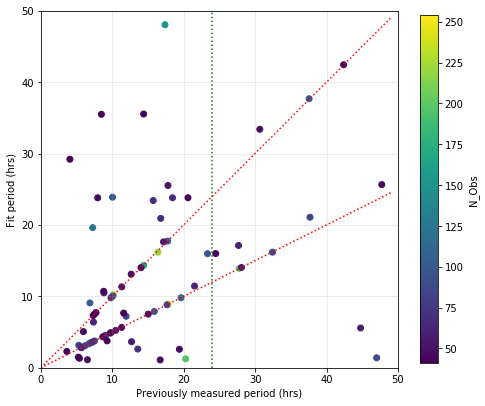

In [58]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_aspect('equal')
plt.scatter(obj_data.rot, obj_data.Period, c=obj_data.Nobs)
plt.colorbar(shrink=0.8, label='N_Obs')
x = np.arange(0, 50)
plt.plot(x, x, 'r:')
plt.plot(x, x/2, 'r:')
plt.axvline(24.0, color='g', linestyle=':')
plt.ylim(0, 50)
plt.xlim(0, 50)
plt.grid(True, alpha=0.3)
plt.ylabel('Fit period (hrs)')
plt.xlabel('Previously measured period (hrs)')

In [59]:
obj_data_disagree = obj_data[obj_data.rot>0][obj_data.Period/obj_data.rot>0.51][obj_data.Period/obj_data.rot<0.98]

/epyc/projects/sso-lc/conda-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Previously measured period (hrs)')

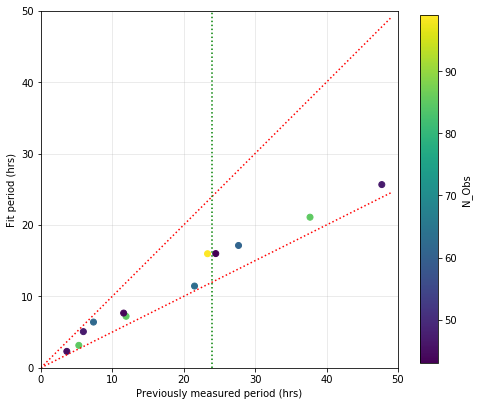

In [60]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_aspect('equal')
plt.scatter(obj_data_disagree.rot, obj_data_disagree.Period, c=obj_data_disagree.Nobs)
plt.colorbar(shrink=0.8, label='N_Obs')
x = np.arange(0, 50)
plt.plot(x, x, 'r:')
plt.plot(x, x/2, 'r:')
plt.axvline(24.0, color='g', linestyle=':')
plt.ylim(0, 50)
plt.xlim(0, 50)
plt.grid(True, alpha=0.3)
plt.ylabel('Fit period (hrs)')
plt.xlabel('Previously measured period (hrs)')

In [61]:
obj_data_disagree#[obj_data_disagree.Nobs>80]

,Name,Nobs,N_rejected,Nobs_g,Nobs_r,Nobs_i,Nights,g-r,r-i,Period,...,argPeri,tPeri,meanAnomaly,epoch,H,g,diam,albedo,rot,ztfname
29,32496,99,0,31,55,13,55,0.606583,0.205519,15.973498,...,275.0,60175.627,232.0,58600.0,10.20,0.15,48.017,0.070,23.340,32496
40,4832,85,1,23,53,9,51,0.619943,0.221049,3.142101,...,210.0,60343.962,218.0,58600.0,10.00,0.15,52.058,0.071,5.319,4832
41,54656,85,1,30,45,10,51,0.598204,0.254836,7.212045,...,179.0,59636.637,276.0,58600.0,10.70,0.15,37.743,0.078,11.937,54656
42,76857,85,0,21,51,13,49,0.589602,0.271237,21.084546,...,256.0,60086.918,239.0,58600.0,11.00,0.15,33.098,0.085,37.690,76857
80,9799,63,1,35,26,2,46,0.538409,0.313071,11.445602,...,114.0,59271.969,304.0,58600.0,9.60,0.15,68.033,0.060,21.520,9799
81,34642,62,1,17,36,9,46,0.555161,0.136591,6.400587,...,266.0,60027.165,242.0,58600.0,10.70,0.15,33.306,0.100,7.374,34642
82,4754,61,2,23,35,3,35,0.611937,0.248488,17.126960,...,192.0,60204.903,229.0,58600.0,10.00,0.15,53.025,0.063,27.680,4754
124,51365,48,0,19,26,3,30,0.623831,0.127018,32.428151,...,256.0,59652.018,273.0,58600.0,10.60,0.15,40.606,0.074,58.760,51365
126,42367,47,1,21,24,2,28,0.594985,0.161789,25.653123,...,343.0,56453.758,178.0,58600.0,11.00,0.15,32.160,0.068,47.740,42367
135,5144,47,0,23,23,1,33,0.609275,-0.048483,5.066287,...,331.0,59936.817,249.0,58600.0,9.00,0.15,80.958,0.074,5.958,5144


In [63]:
obj_data_disagree.query('rot < 100')[['Name', 'Period', 'rot', 'a', 'e', 'inc']]

,Name,Period,rot,a,e,inc
29,32496,15.973498,23.340,5.27,0.07820,30.50
40,4832,3.142101,5.319,5.27,0.14000,19.10
41,54656,7.212045,11.937,5.28,0.07660,32.80
42,76857,21.084546,37.690,5.27,0.09340,23.00
80,9799,11.445602,21.520,5.19,0.04800,30.50
81,34642,6.400587,7.374,5.22,0.09790,19.60
82,4754,17.126960,27.680,5.25,0.00749,12.30
124,51365,32.428151,58.760,5.22,0.05720,30.20
126,42367,25.653123,47.740,5.21,0.04380,29.10
135,5144,5.066287,5.958,5.20,0.27300,8.91


In [169]:
name = obj_data_disagree.Name[164]

/epyc/projects/sso-lc/conda-env/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/epyc/projects/sso-lc/conda-env/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


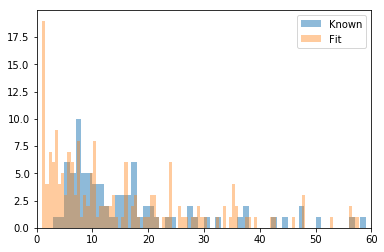

In [114]:
n, b, p  = plt.hist(knownrot.rot, bins=100, range=[0, 100], alpha=0.5, label="Known")
n, b, p  = plt.hist(fitrot.Period, bins=100, alpha=0.4, label="Fit")
plt.xlim(0, 60)
plt.legend()

# Find the outlier asteroid data in the ztf files

In [66]:
all_detections = pd.read_csv("ztf_alert_sso.csv")

/epyc/projects/sso-lc/conda-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (81,101) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
all_detections

,objectId,jd,fid,pid,diffmaglim,programid,candid,isdiffpos,tblid,nid,...,clrrms,neargaia,neargaiabright,maggaia,maggaiabright,exptime,drb,drbversion,obsdate,mjd
0,ZTF18abcdwzp,2.458289e+06,3,534178763215,19.8391,2,534178763215015012,t,12,534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-19T04:17:25.002,58288.178333
1,ZTF18abcdxlq,2.458289e+06,1,534194142015,20.4920,2,534194142015015009,t,9,534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-19T04:39:33.998,58288.193715
2,ZTF18abcdxgz,2.458289e+06,3,534186883815,19.6875,2,534186883815015006,t,6,534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-19T04:29:07.002,58288.186458
3,ZTF18abcdyhx,2.458289e+06,1,534205554515,20.6061,2,534205554515015011,t,11,534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-19T04:56:00.004,58288.205127
4,ZTF18abcdzdy,2.458289e+06,1,534208373715,20.6345,2,534208373715015030,t,30,534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-19T05:00:03.997,58288.207951
5,ZTF18abcdzgl,2.458289e+06,1,534207925015,20.7395,2,534207925015015006,t,6,534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-19T04:59:24.997,58288.207500
6,ZTF18abcdzpr,2.458289e+06,1,534217373615,20.5887,2,534217373615015008,t,8,534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-19T05:13:01.001,58288.216944
7,ZTF18abcdzor,2.458289e+06,1,534216902015,20.5262,2,534216902015015018,t,18,534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-19T05:12:20.998,58288.216481
8,ZTF18abcdzqd,2.458289e+06,1,534217370515,20.6096,2,534217370515015026,t,26,534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-19T05:13:01.001,58288.216944
9,ZTF18abcdzyi,2.458289e+06,1,534221794515,20.5586,2,534221794515015024,t,24,534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-19T05:19:23.002,58288.221366


In [67]:
# Identify the moving objects which are likely to be good targets for lightcurve determination.
objnames = ztf.identify_candidates(all_detections, min_obs=10, dist_cutoff=10)

In [68]:
len(objnames)

108975

In [184]:
ast = ztf.AsteroidObj(magcol='magpsf')
ast(alertdata, name, minJD=2458486, maxJD=2458500)

Filter 2 (r) has 24 observations


In [185]:
obs = ast.obs

In [186]:
sum(obs.fid==2)

24

In [187]:
time = obs.jd[obs.fid==2]

In [188]:
t0 = time[3:4].values

In [189]:
t0

array([2458486.5969676])

In [190]:
flux = obs.magpsf[obs.fid==2]

In [193]:
obs.columns

Index(['objectId', 'jd', 'fid', 'pid', 'diffmaglim', 'programid', 'candid',
       'isdiffpos', 'tblid', 'nid',
       ...
       'drbversion', 'obsdate', 'mjd', 'magcorrZTF', 'magOO', 'phaseangle',
       'heliodist', 'geodist', 'velocity', 'magcorrOO'],
      dtype='object', length=111)

In [195]:
flux_err = obs.sigmapsf

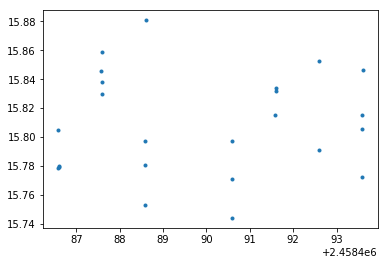

In [202]:
#plt.errorbar(time,flux, yerr = flux_err, ls="")
plt.plot(time, flux, ".")
#plt.vlines(t0, 15.5, 16)

In [203]:
name

'1437'

In [204]:
import pandas as pd

In [219]:
ztf_1437_r

,0,1,2
0,2.458487e+06,15.7788,0.035471
1,2.458487e+06,15.8048,0.032772
2,2.458487e+06,15.7800,0.029938
3,2.458487e+06,15.7795,0.034039
4,2.458488e+06,15.8457,0.032561
5,2.458488e+06,15.8383,0.031612
6,2.458488e+06,15.8301,0.026277
7,2.458488e+06,15.8587,0.029175
8,2.458489e+06,15.7972,0.036919
9,2.458489e+06,15.7809,0.043848


In [209]:
ztf_1437_r = pd.DataFrame(np.array([time, flux,flux_err]).T)

In [214]:
ztf_1437_r.to_csv(r"export_dataframe.txt", header=None, index=None, sep=' ')

PermissionError: [Errno 13] Permission denied: 'export_dataframe.txt'

In [215]:
import numpy as np

In [218]:
np.savetxt("text.txt", ztf_1437_r, delimiter=",")

PermissionError: [Errno 13] Permission denied: 'text.txt'

In [210]:
ztf_1437_r

,0,1,2
0,2.458487e+06,15.7788,0.035471
1,2.458487e+06,15.8048,0.032772
2,2.458487e+06,15.7800,0.029938
3,2.458487e+06,15.7795,0.034039
4,2.458488e+06,15.8457,0.032561
5,2.458488e+06,15.8383,0.031612
6,2.458488e+06,15.8301,0.026277
7,2.458488e+06,15.8587,0.029175
8,2.458489e+06,15.7972,0.036919
9,2.458489e+06,15.7809,0.043848


In [194]:
list(obs.columns.values)

['objectId',
 'jd',
 'fid',
 'pid',
 'diffmaglim',
 'programid',
 'candid',
 'isdiffpos',
 'tblid',
 'nid',
 'rcid',
 'field',
 'xpos',
 'ypos',
 'ra',
 'decl',
 'magpsf',
 'sigmapsf',
 'chipsf',
 'magap',
 'sigmagap',
 'distnr',
 'magnr',
 'sigmagnr',
 'chinr',
 'sharpnr',
 'sky',
 'magdiff',
 'fwhm',
 'classtar',
 'mindtoedge',
 'magfromlim',
 'seeratio',
 'aimage',
 'bimage',
 'aimagerat',
 'bimagerat',
 'elong',
 'nneg',
 'nbad',
 'rb',
 'ssdistnr',
 'ssmagnr',
 'ssnamenr',
 'sumrat',
 'magapbig',
 'sigmagapbig',
 'ranr',
 'decnr',
 'sgmag1',
 'srmag1',
 'simag1',
 'szmag1',
 'sgscore1',
 'distpsnr1',
 'ndethist',
 'ncovhist',
 'jdstarthist',
 'jdendhist',
 'scorr',
 'tooflag',
 'objectidps1',
 'objectidps2',
 'sgmag2',
 'srmag2',
 'simag2',
 'szmag2',
 'sgscore2',
 'distpsnr2',
 'objectidps3',
 'sgmag3',
 'srmag3',
 'simag3',
 'szmag3',
 'sgscore3',
 'distpsnr3',
 'nmtchps',
 'rfid',
 'jdstartref',
 'jdendref',
 'nframesref',
 'rbversion',
 'dsnrms',
 'ssnrms',
 'dsdiff',
 'magzps